## Setup

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:90% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore")

import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(linewidth=170)
np.set_printoptions(suppress=True)
np.random.seed(8)

import matplotlib.pyplot as plt
%matplotlib inline

from time import time, sleep
sleep(0.2)

C:\Users\raziel lab\AppData\Local\Temp\ipykernel_21344\4262382925.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Imports & Parameters

In [2]:
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
random_state = 8

## Loading the data

In [3]:
total_consumption_data = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Data Preprocessing/raw_data/full_direct_consumption_data.csv')
total_consumption_data.head()

,Unnamed: 0,January-15,February-15,March-15,April-15,May-15,June-15,July-15,August-15,September-15,October-15,November-15,December-15,January-16,February-16,March-16,April-16,May-16,June-16,July-16,August-16,September-16,October-16,November-16,December-16,January-17,February-17,March-17,April-17,May-17,June-17,July-17,August-17,September-17,October-17,November-17,December-17,January-18,February-18,March-18,April-18,May-18,June-18,July-18,August-18,September-18,October-18,November-18,December-18,January-19,February-19,March-19,April-19,May-19,June-19,July-19,August-19,September-19,October-19,November-19,December-19,January-20,February-20,March-20,April-20,May-20,June-20,July-20,August-20,September-20,October-20,November-20,December-20
0,Electricity Company Counter,"3,354,488.80","3,030,597.60","3,241,502.30","3,034,376.80","3,883,110.90","4,065,047.60","4,434,543.80","4,690,761.00","4,053,599.19","3,903,177.42","3,539,500.00","3,510,177.40","3,445,540.00","3,196,490.50","3,292,367.00","3,226,024.50","3,822,070.50","4,260,933.00","4,607,485.00","4,448,433.50","4,065,365.50","3,251,455.00","3,405,779.00","3,430,355.00","3,626,306.50","3,208,575.00","3,505,659.50","3,239,641.50","4,018,215.00","4,441,878.50","5,007,129.00","4,875,123.50","4,176,939.00","3,590,878.50","3,439,565.50","3,426,506.00","3,557,478.00","3,129,743.00","3,373,342.50","3,206,203.50","4,065,136.50","4,303,577.50","4,764,724.50","4,601,894.00","3,797,049.50","4,058,220.52","3,458,595.50","3,486,577.00","3,549,980.50","3,145,473.50","3,457,133.50","3,048,124.50","3,857,757.50","4,516,239.00","4,896,729.00","4,605,829.50","4,310,188.50","3,661,294.50","3,501,474.00","3,677,010.00","3,733,662.34","3,402,911.16","3,044,460.94","2,470,572.16","3,344,375.64","3,691,921.18","4,328,643.14","4,456,943.98","4,287,362.44","3,753,988.22","3,243,847.00","3,194,604.56"
1,Building 14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"19,442.02","19,321.73","15,904.75","11,806.51","14,543.88","15,891.91","23,492.34","19,301.28","16,487.18","14,697.42","16,170.48","20,810.06","25,952.96","24,141.94","19,194.46","13,677.54","17,702.63","18,799.58","19,552.23","17,281.99","13,251.50","15,974.04","15,058.30","19,510.34","32,322.67","20,597.35","19,120.75","12,793.32","15,889.49","19,220.65","21,234.02","15,783.52","16,713.58","13,395.52","15,324.38","18,731.01","21,346.58","18,317.78","12,132.83","7,308.02","11,366.84","13,582.40","13,594.38","13,306.80","12,334.07","10,899.14","8,913.22","10,216.24"
2,Building 15-16,"76,159.75","73,075.27","74,557.07","69,575.98","77,537.07","79,975.29","78,243.42","70,314.84","64,041.67","53,654.00","70,964.03","66,072.11","78,345.00","106,225.18","79,563.12","67,148.20","74,772.29","75,372.79","73,530.57","68,010.61","65,365.85","58,248.78","71,316.12","74,938.32","79,334.66","68,668.28","69,541.81","59,597.69","70,818.71","72,572.08","73,746.99","72,094.32","66,696.94","66,406.45","72,001.80","76,639.44","82,812.99","72,721.28","74,877.44","71,604.08","81,380.29","80,127.66","80,964.67","74,981.75","69,768.22","77,318.18","76,293.60","81,918.65","80,986.07","68,354.88","79,253.44","71,262.98","78,553.85","80,835.15","78,680.25","74,845.36","74,679.36","72,665.16","75,472.21","84,106.24","84,428.05","72,613.89","56,865.91","41,954.40","56,673.32","60,357.77","56,887.93","64,589.00","68,955.00","61,578.00","63,558.00","58,956.93"
3,Building 17,"21,957.92","18,028.98","15,149.43","11,945.39","12,618.82","14,247.49","14,256.78","12,867.08","11,489.58","12,519.92","11,864.02","15,405.43","16,967.56","15,692.17","14,008.20","11,988.75","13,516.96","13,433.53","13,329.65","11,626.67","12,350.81","11,203.27","13,734.67","18,250.90","19,525.31","17,215.48","17,108.65","13,157.98","14,934.39","13,571.73","13,220.69","12,000.00","12,789.88","9,230.97","10,647.12","11,827.01","16,272.08","13,779.67","14,547.47","11,773.78","12,022.90","10,155.42","10,657.50","10,286.50","10,189.44","10

In [4]:
buildings_types = pd.read_csv('C:/Users/raziel lab/PycharmProjects/ConsumptionModels/Models/Data Preprocessing/raw_data/buildings_types.csv')
buildings_types.head()

,Buildings,Type
0,Building 14,"Offices, Teaching Labs"
1,Building 15-16,"Offices, Teaching Labs"
2,Building 17,"Offices, Teaching Labs"
3,Building 18,"Offices, Teaching Labs"
4,Building 22,Others


## Main

In [5]:
total_consumption_data.drop([0], axis=0, inplace=True)
total_consumption_data.reset_index(drop=True, inplace=True)

In [6]:
total_consumption_data.rename(columns = {'Unnamed: 0':'building_number'}, inplace = True)
buildings_types.rename(columns = {'Buildings':'building_number'}, inplace = True)

In [7]:
total_consumption_data = total_consumption_data.replace({',':''}, regex=True)
total_consumption_data.iloc[:,1:] = total_consumption_data.iloc[:,1:].apply(pd.to_numeric)

In [8]:
energy_center_consumption_data = total_consumption_data.iloc[48:,:]
buildings_consumption_data = total_consumption_data.drop(energy_center_consumption_data.index)

In [9]:
buildings_consumption_data = pd.merge(buildings_consumption_data, buildings_types, on='building_number')

labs_buildings_consumption_data = buildings_consumption_data[buildings_consumption_data['Type'] == 'Labs']
non_labs_buildings_consumption_data = buildings_consumption_data.drop(labs_buildings_consumption_data.index)

labs_buildings_consumption_data.drop(['Type'], axis=1, inplace=True)
non_labs_buildings_consumption_data.drop(['Type'], axis=1, inplace=True)

non_labs_buildings_consumption_data.reset_index(drop=True, inplace=True)
labs_buildings_consumption_data.reset_index(drop=True, inplace=True)
energy_center_consumption_data.reset_index(drop=True, inplace=True)

In [10]:
non_labs_buildings_consumption_data.head()

,building_number,January-15,February-15,March-15,April-15,May-15,June-15,July-15,August-15,September-15,October-15,November-15,December-15,January-16,February-16,March-16,April-16,May-16,June-16,July-16,August-16,September-16,October-16,November-16,December-16,January-17,February-17,March-17,April-17,May-17,June-17,July-17,August-17,September-17,October-17,November-17,December-17,January-18,February-18,March-18,April-18,May-18,June-18,July-18,August-18,September-18,October-18,November-18,December-18,January-19,February-19,March-19,April-19,May-19,June-19,July-19,August-19,September-19,October-19,November-19,December-19,January-20,February-20,March-20,April-20,May-20,June-20,July-20,August-20,September-20,October-20,November-20,December-20
0,Building 14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19442.02,19321.73,15904.75,11806.51,14543.88,15891.91,23492.34,19301.28,16487.18,14697.42,16170.48,20810.06,25952.96,24141.94,19194.46,13677.54,17702.63,18799.58,19552.23,17281.99,13251.5,15974.04,15058.3,19510.34,32322.67,20597.35,19120.75,12793.32,15889.49,19220.65,21234.02,15783.52,16713.58,13395.52,15324.38,18731.01,21346.58,18317.78,12132.83,7308.02,11366.84,13582.4,13594.38,13306.8,12334.07,10899.14,8913.22,10216.24
1,Building 15-16,76159.75,73075.27,74557.07,69575.98,77537.07,79975.29,78243.42,70314.84,64041.67,53654.0,70964.03,66072.11,78345.0,106225.18,79563.12,67148.2,74772.29,75372.79,73530.57,68010.61,65365.85,58248.78,71316.12,74938.32,79334.66,68668.28,69541.81,59597.69,70818.71,72572.08,73746.99,72094.32,66696.94,66406.45,72001.8,76639.44,82812.99,72721.28,74877.44,71604.08,81380.29,80127.66,80964.67,74981.75,69768.22,77318.18,76293.6,81918.65,80986.07,68354.88,79253.44,71262.98,78553.85,80835.15,78680.25,74845.36,74679.36,72665.16,75472.21,84106.24,84428.05,72613.89,56865.91,41954.4,56673.32,60357.77,56887.93,64589.0,68955.0,61578.0,63558.0,58956.93
2,Building 17,21957.92,18028.98,15149.43,11945.39,12618.82,14247.49,14256.78,12867.08,11489.58,12519.92,11864.02,15405.43,16967.56,15692.17,14008.2,11988.75,13516.96,13433.53,13329.65,11626.67,12350.81,11203.27,13734.67,18250.9,19525.31,17215.48,17108.65,13157.98,14934.39,13571.73,13220.69,12000.0,12789.88,9230.97,10647.12,11827.01,16272.08,13779.67,14547.47,11773.78,12022.9,10155.42,10657.5,10286.5,10189.44,10313.26,10743.95,13159.73,17116.72,13160.29,14924.58,12083.06,10763.36,9963.47,10674.28,9750.88,10825.56,9763.25,10313.2,14048.81,15075.77,12487.45,8015.5,4239.81,9064.81,9694.54,9478.95,9161.28,8544.02,8701.6,8534.39,9705.37
3,Building 18,21782.05,17671.29,17120.29,14665.17,19949.65,19481.16,17474.01,16441.46,15931.28,17923.87,19040.25,19952.29,22787.02,19078.92,19471.39,15607.42,18868.86,19269.22,18303.41,18131.3,18112.39,14324.72,19791.6,20858.45,22545.04,19120.67,20359.79,16608.06,21140.01,21411.49,21194.47,18133.69,18581.54,19131.07,21776.28,24448.23,27394.09,19517.38,19566.95,17290.93,21233.14,20877.07,19840.03,18410.72,16270.22,20049.09,23312.39,26734.16,34066.53,25909.36,19466.09,15055.7,17135.52,17391.83,18756.38,18569.44,16230.71,16298.52,16068.0,20430.97,29965.05,22239.8,12466.28,6382.53,13140.51,15736.39,15494.02,15187.64,14304.8,12376.8,13100.75,14605.35
4,Building 22,96120.52,90718.93,38409.86,39974.09,37609.14,31630.15,103385.36,100701.26,77789.97,104667.5,118398.6,121195.72,115248.7,106045.09,106700.1,95520.76,112520.59,118853.72,126107.6,96934.9,100968.68,75002.41,106690.02,102678.93,115803.62,110260.97,108950.07,91071.53,108813.69,116053.38,124244.12,96162.45,87552.0,80117.54,103031.95,103394.47,112677.18,98684.74,96289.44,82684.76,108212.62,113817.29,122601.23,93652.84,72327.85,113715.8,118752.54,109815.58,96588.84,86662.73,88725.18,74535.23,97250.64,100709.34,106762.79,77097.23,88570.44,93544.0,115000.0,97697.14,90948.81,82801.07,57805.84,24640.2,65340.03,72707.87,83257.36,86117.21,72422.59,72737.35,63616.19,69856.64


In [11]:
labs_buildings_consumption_data.head()

,building_number,January-15,February-15,March-15,April-15,May-15,June-15,July-15,August-15,September-15,October-15,November-15,December-15,January-16,February-16,March-16,April-16,May-16,June-16,July-16,August-16,September-16,October-16,November-16,December-16,January-17,February-17,March-17,April-17,May-17,June-17,July-17,August-17,September-17,October-17,November-17,December-17,January-18,February-18,March-18,April-18,May-18,June-18,July-18,August-18,September-18,October-18,November-18,December-18,January-19,February-19,March-19,April-19,May-19,June-19,July-19,August-19,September-19,October-19,November-19,December-19,January-20,February-20,March-20,April-20,May-20,June-20,July-20,August-20,September-20,October-20,November-20,December-20
0,Building 29,81857.8,72343.28,82954.01,79239.92,87664.92,86926.99,88240.18,87621.81,77839.87,78641.96,81971.47,80412.16,80142.88,72968.79,79437.33,72146.4,81012.26,83579.0,85272.0,79406.71,76701.6,75709.0,74337.0,90914.52,88955.17,83707.19,89444.48,78621.36,84048.67,89583.19,89042.97,89398.89,85671.16,82361.93,82549.76,88821.38,92328.19,80740.19,87017.36,81733.86,85976.75,83882.76,87119.34,85716.74,71933.1,88258.44,84680.44,87789.73,85861.55,78447.22,86993.88,77298.03,89654.63,87487.21,101537.37,79497.73,76146.17,73374.82,77281.7,83243.98,81750.27,75036.53,71500.56,61515.44,71541.62,80574.04,76480.19,74384.12,75057.86,73658.6,75892.72,78434.9
1,Building 33,64547.9,55936.87,52793.14,47815.65,56332.31,59818.06,57945.84,59360.1,52097.03,54372.86,58765.51,62288.64,64928.27,50219.14,58466.46,48432.3,60139.3,70259.0,55678.62,59695.52,54937.3,44831.6,57635.41,64672.45,71313.4,54706.63,53937.61,50762.32,52043.15,71344.01,42610.06,66634.08,69081.19,77888.42,83852.12,80777.63,75951.46,50000.0,90578.83,89388.9,96339.64,95496.77,103553.09,97112.14,89450.43,86258.08,87788.09,85788.84,91019.02,80655.13,86751.38,78857.63,72229.08,70786.04,109292.01,91346.83,91676.17,85431.57,92692.95,99644.07,100854.3,85791.72,77247.0,63935.65,79220.88,80837.23,86150.63,86423.78,64458.85,84019.02,87829.38,83900.24
2,Building 38,16392.99,12839.51,12798.74,8786.98,25780.39,16401.06,16208.25,15289.94,13504.82,14908.81,17050.73,18193.71,17028.27,13744.52,14620.6,13945.6,15994.15,13712.45,13010.81,12141.65,11723.55,11208.35,15220.44,15940.08,18827.35,14726.62,15624.51,14269.63,16396.97,15182.85,14494.31,13657.68,12865.53,13872.69,15978.97,16490.23,15821.13,13514.09,15522.7,15009.16,17924.08,16228.37,15561.37,13923.55,11854.45,14356.57,16149.16,17059.17,15582.61,12980.78,15105.73,13368.03,15204.89,13891.09,13903.07,12097.18,12202.62,12847.45,14312.59,14860.42,15305.06,12717.99,11808.76,10279.21,11537.55,11679.72,12102.77,12156.62,11284.94,12548.2,15084.21,14559.92
3,Building 39,138875.32,118836.37,126337.33,115244.37,118416.93,116710.98,115955.07,118480.42,115577.58,124850.31,128989.98,143526.81,140114.15,129313.72,135888.49,126084.87,102810.32,94444.81,121297.59,109007.97,113000.0,107812.49,122825.13,141056.44,136727.6,105332.61,144228.79,123183.36,121273.0,123281.24,125022.87,126832.97,121103.53,113883.16,112346.27,120679.83,124298.33,112915.13,115828.72,108660.36,114370.32,106570.72,111105.99,111479.32,101653.95,107926.92,104621.28,114192.29,119101.69,106997.79,116192.2,104062.81,104837.86,92303.46,107483.53,110382.81,107589.25,108008.82,103905.58,112033.15,135701.0,116698.0,131778.42,100223.16,107872.74,110873.36,115988.24,117015.89,112241.33,113492.75,110696.75,122145.21
4,Building 40,93014.65,85992.97,82496.12,75956.81,79174.05,76042.15,76600.37,84114.63,82275.71,88408.73,84160.32,100210.09,107229.86,88780.89,92026.8,76260.48,78961.37,83528.75,84640.63,92003.47,83610.24,65598.46,88843.31,85595.66,116710.4,82583.16,94786.44,80232.33,82964.0,81166.12,88418.83,88838.17,78431.8,72030.49,79447.46,81106.45,90350.81,78379.07,83651.95,76978.96,79997.83,78124.05,80063.67,82642.27,74245.84,78647.97,79932.8,90288.63,93124.06,75878.92,81513.72,75871.12,79655.33,78427.85,87168.33,86828.03,84543.39,77693.81,82908.64,96510.94,102457.42,9

In [12]:
energy_center_consumption_data

,building_number,January-15,February-15,March-15,April-15,May-15,June-15,July-15,August-15,September-15,October-15,November-15,December-15,January-16,February-16,March-16,April-16,May-16,June-16,July-16,August-16,September-16,October-16,November-16,December-16,January-17,February-17,March-17,April-17,May-17,June-17,July-17,August-17,September-17,October-17,November-17,December-17,January-18,February-18,March-18,April-18,May-18,June-18,July-18,August-18,September-18,October-18,November-18,December-18,January-19,February-19,March-19,April-19,May-19,June-19,July-19,August-19,September-19,October-19,November-19,December-19,January-20,February-20,March-20,April-20,May-20,June-20,July-20,August-20,September-20,October-20,November-20,December-20
0,Building 67,192449.89,179849.67,223332.78,221008.93,406539.58,452258.33,495923.4,520979.85,433458.79,337391.2,210695.34,379109.12,266877.0,154062.0,209017.0,218330.89,364969.1,382985.62,764086.9,611074.0,420207.48,257038.47,243986.89,199828.55,211314.09,93596.9,181722.93,236696.02,398786.01,423998.0,678736.85,627811.0,402492.16,278709.53,257469.16,201495.53,182130.87,168072.87,217206.79,192297.22,334044.0,402363.66,465695.33,450823.73,388632.81,274205.79,211213.41,126473.6,134829.5,119714.05,204258.3,117588.44,325642.89,437608.48,452263.0,444373.82,409361.52,321923.31,247917.18,146410.42,153983.93,135112.68,133567.92,88900.56,240147.56,328506.89,452443.3,584191.3,437158.34,388870.71,197722.52,175876.78
1,Fuel Oil System,456.77,406.91,439.28,7.35,0.0,0.0,0.0,0.0,0.0,0.02,69.25,1353.44,10007.39,8872.31,1097.6,1381.88,172.09,168.84,172.09,172.55,165.37,169.85,1123.24,9622.95,8312.52,7873.92,8662.38,1716.2,256.99,231.86,357.48,162.28,101.04,0.0,3679.7,10426.46,10728.22,9594.89,6235.68,0.0,0.0,0.0,0.0,0.0,0.0,370.4,702.46,8742.09,9823.17,6983.89,7932.33,2946.47,0.0,0.0,419.76,0.0,0.0,58.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1200 Ton Refrigerator,153564.17,164720.23,37946.1,0.05,156902.66,137719.48,103053.11,134939.98,156993.19,44902.8,171521.48,124585.49,109151.89,111480.3,115508.38,227078.99,212583.81,294064.52,212583.81,312132.11,253011.01,123914.9,198634.69,86889.57,88181.33,75212.0,130351.02,171419.33,177834.85,208885.62,38821.07,41150.34,70089.46,138525.79,165233.73,244042.98,236172.1,258068.0,263083.07,225312.26,88151.26,105688.67,43526.14,35567.94,27391.71,107308.38,17033.02,1265.22,15126.14,132.35,489.47,242.24,0.38,0.06,49652.06,33134.69,39653.38,14787.9,0.0,0.13,0.0,0.0,0.0,38228.83,72379.87,40362.37,25935.23,14.66,31258.62,8953.79,402174.59,280680.54
3,1500 Ton Refrigerator,168484.75,141582.03,233287.94,238783.47,329254.79,231588.55,487734.9,572826.46,467944.86,252067.84,275686.32,71574.0,215.58,595.38,432.66,684.66,572.03,7449.92,572.03,8030.38,20787.95,6455.52,71537.34,67958.82,73041.52,11580.64,116183.28,102407.15,58709.09,53591.09,374567.46,360248.45,223899.98,256228.26,35626.96,715.58,487.12,12426.98,2726.27,61729.71,102210.02,221410.0,260329.81,401431.81,177062.82,117382.38,280305.81,371128.75,300908.1,334677.26,398598.64,388276.77,213410.98,253400.13,444557.92,488808.37,387120.28,230286.07,285725.33,452687.88,383507.34,390452.85,39386.4,313293.36,277019.99,213181.23,295923.34,120171.92,21772.92,26486.28,61566.61,11509.44
4,2000 Ton Refrigerator,1246.7,39082.57,379526.09,205166.78,371906.82,579998.7,664986.69,777882.56,594080.93,643732.74,96171.07,140536.14,156357.18,194986.66,220563.47,278969.34,484561.63,637265.6,484561.63,788457.47,666459.46,392493.94,147131.43,144572.05,158407.51,208162.13,153754.62,185682.53,231247.83,90435.86,28003.94,373254.09,206356.27,18362.95,89617.54,41157.44,540.64,957.18,87305.58,84695.09,287825.47,560294.1,357041.9,165757.95,108960.72,70310.99,132229.42,13936.83,2081.47,2711.2,81216.59,423.68,128381.65,234452.03,448.32,481.86,458.05,386.69,259803.04,345.47,388.64,1218.94,358684.29,374.75,508.8,1004.16,37409.54,102495.78,65819.39,1982.34,596.1,2435.14
5,2000 Ton Refrigerator New,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

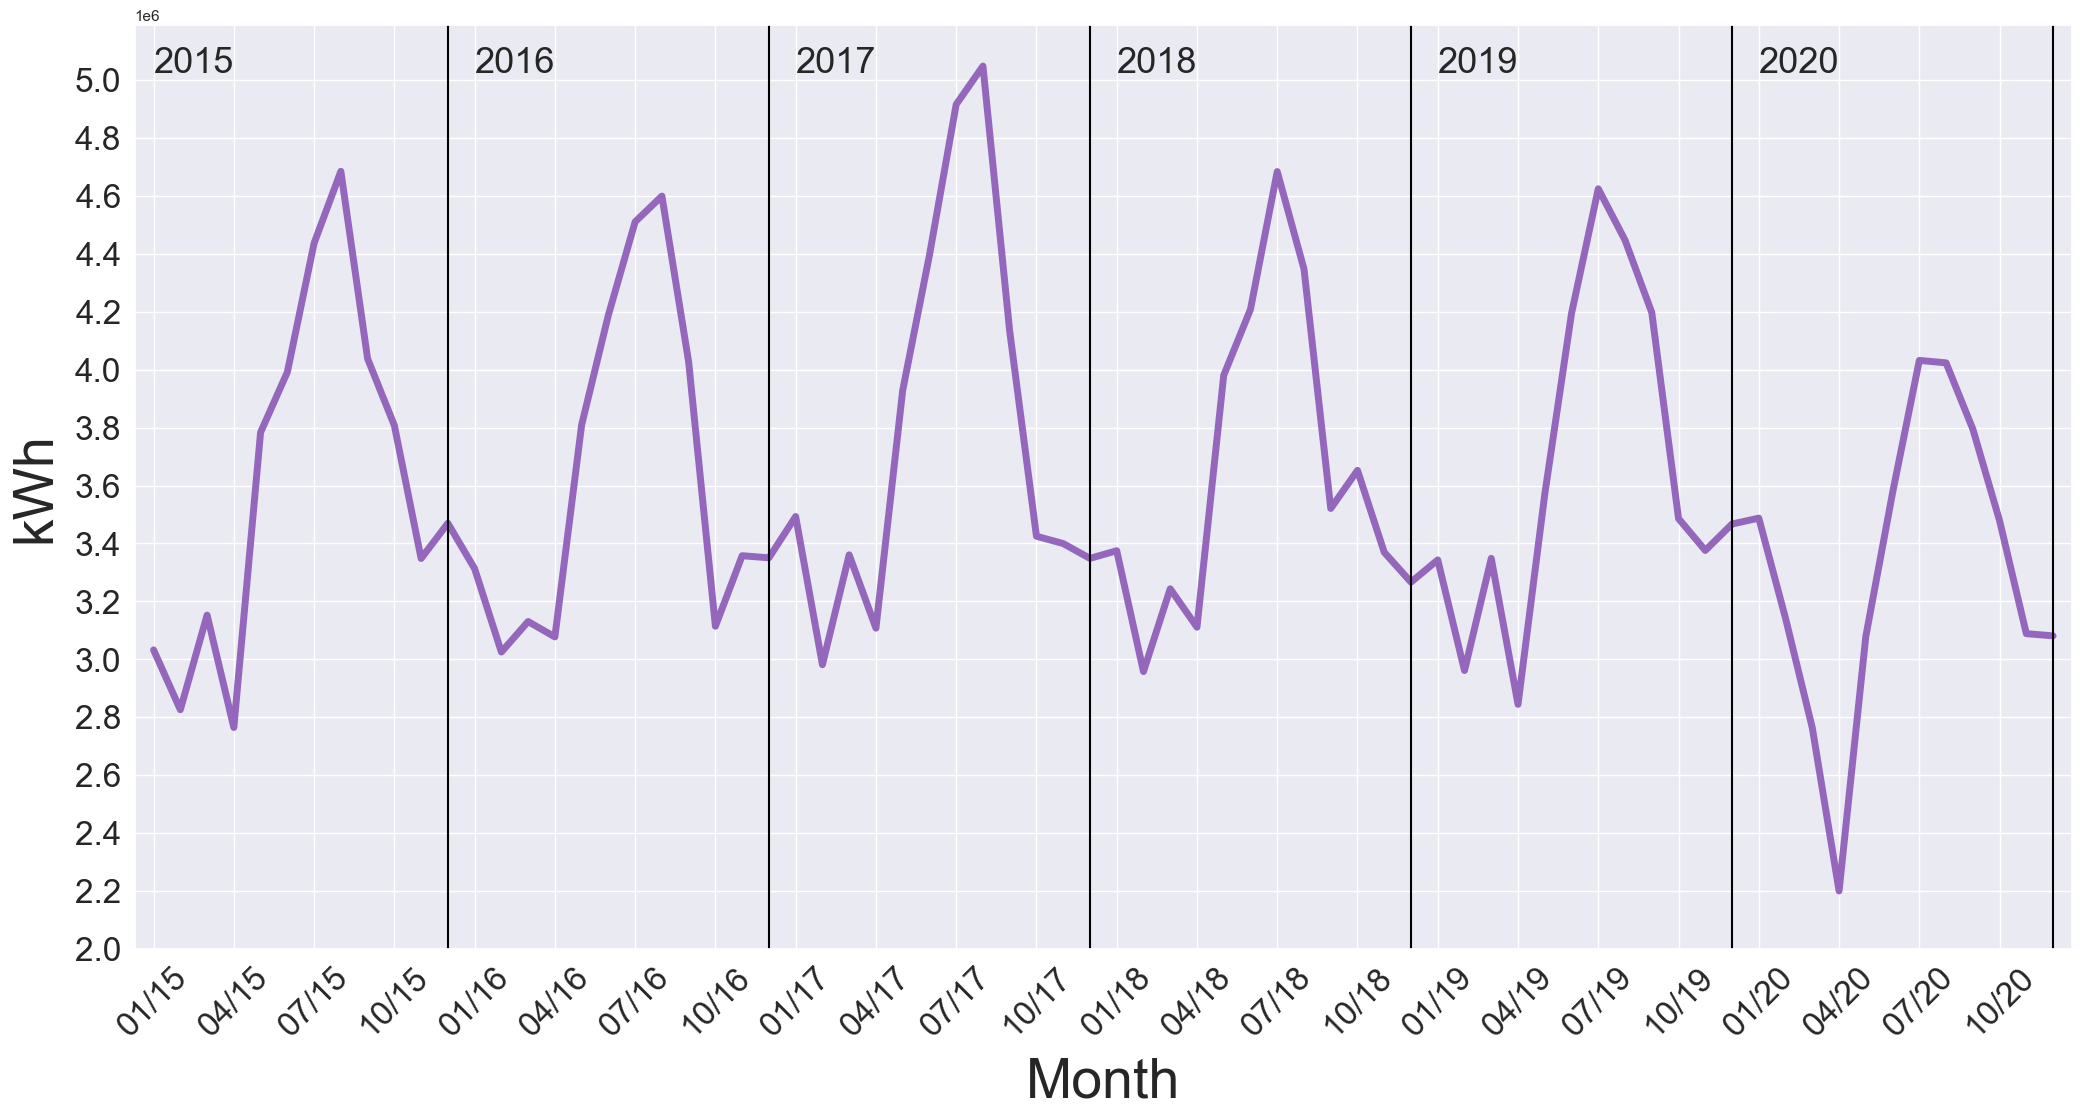

In [13]:
plt.figure(figsize=(25,12))

plt.plot(pd.date_range('2015', periods=72, freq='MS').strftime('%m/%y'), total_consumption_data.iloc[:,1:].sum(axis=0), linewidth=5, color='tab:purple')

plt.xticks(np.arange(0, 72, step=3), rotation = 45)
plt.yticks(np.arange(2000000, 5200000, step=200000))
plt.margins(x=0.01)

plt.xlabel("Month", fontsize=40, labelpad=10)
plt.ylabel("kWh", fontsize=40, labelpad=10)

#graph_title = 'Total BGU Consumption'
#plt.title(graph_title, fontsize=30, pad=10)

plt.tick_params(axis='x', which='major', labelsize=24)
plt.tick_params(axis='y', which='major', labelsize=24)

str_1 = '12/'
str_2 = '01/'
for i in range (15,21):
    str_3 =  str_1 + str(i)
    str_4 =  str_2 + str(i)
    str_5 =  '20' + str(i)
    plt.axvline(str_3, color='black')
    plt.text(str_4, 5025000, str_5, fontsize=26)

plt.savefig('Total BGU Consumption.png')
plt.show()

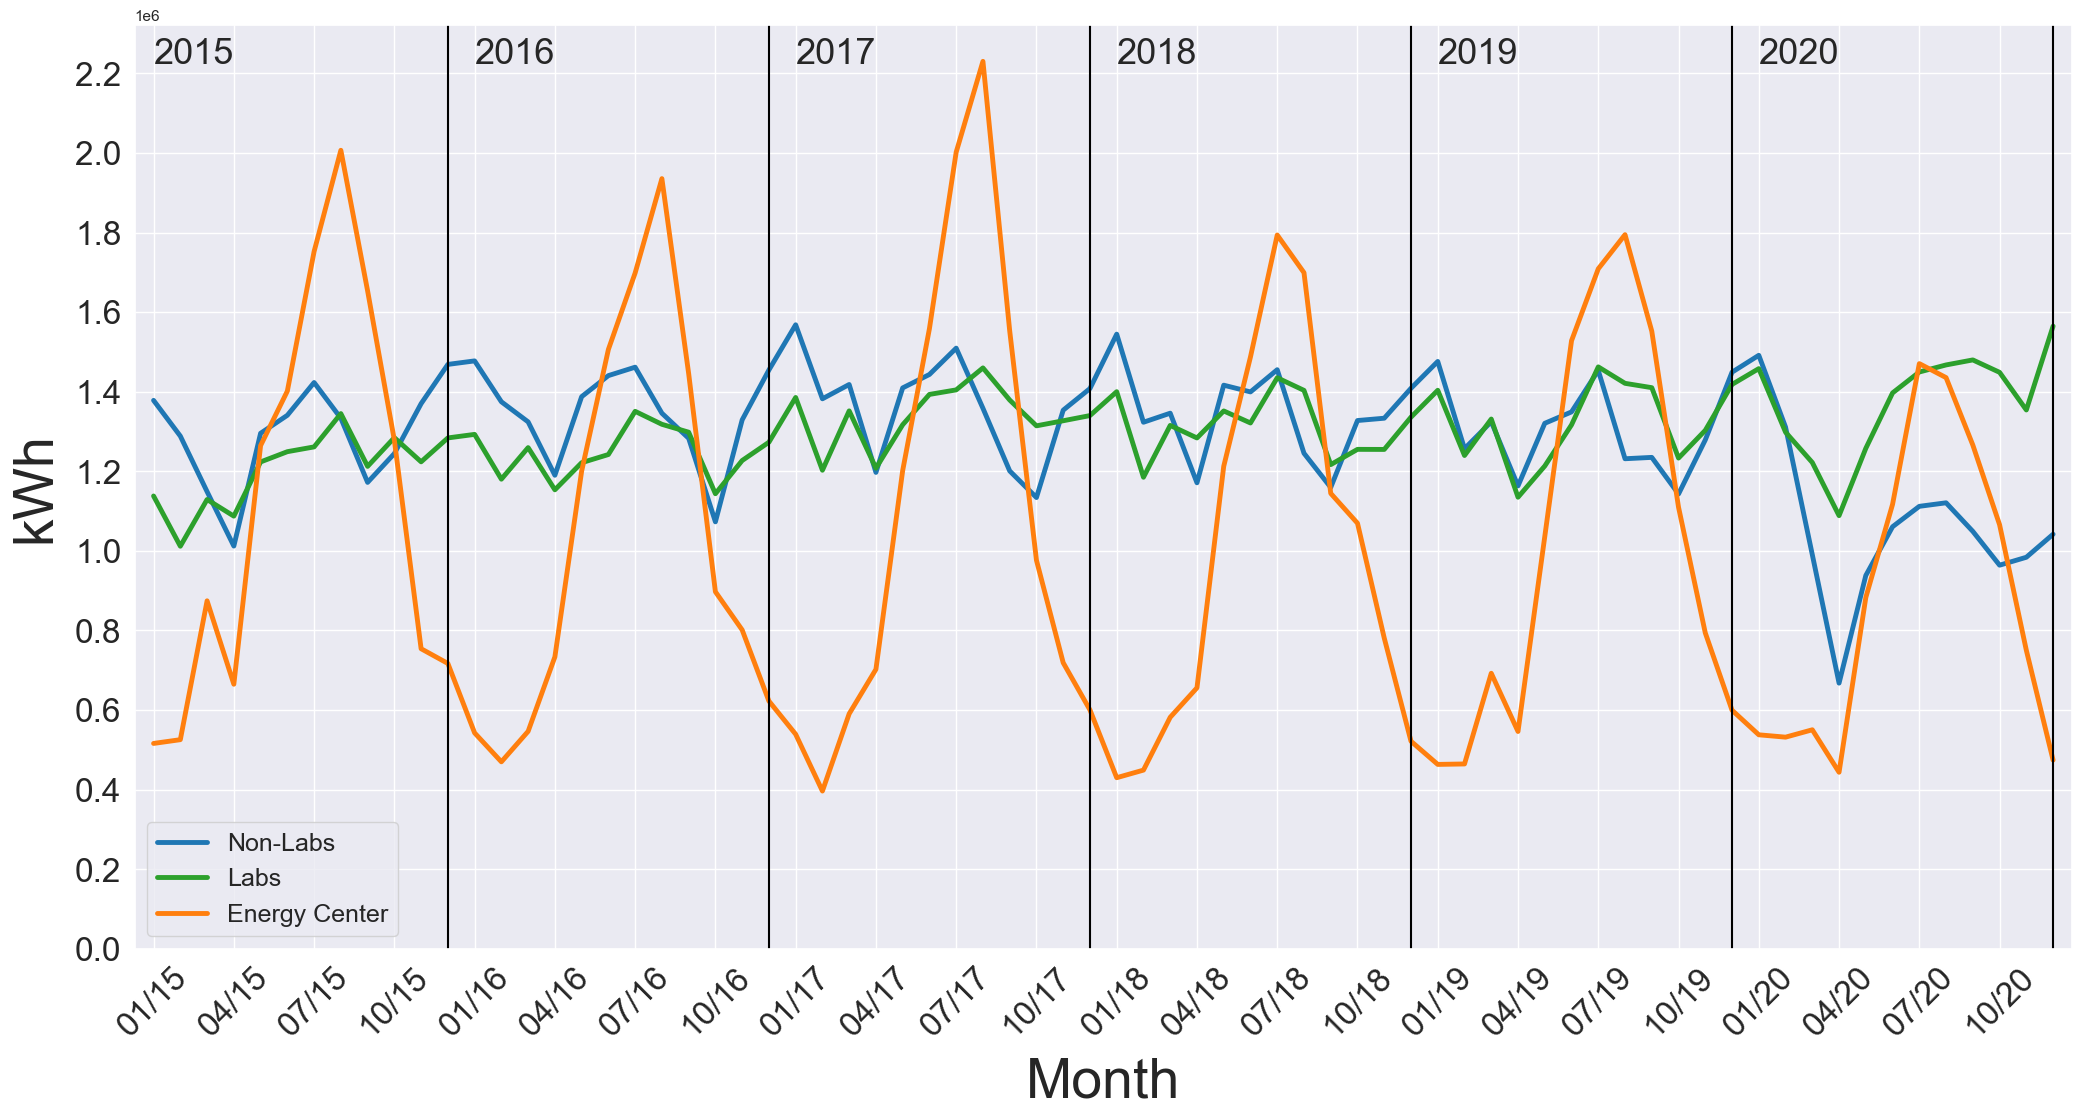

In [14]:
plt.figure(figsize=(25,12))

plt.plot(pd.date_range('2015', periods=72, freq='MS').strftime('%m/%y'), non_labs_buildings_consumption_data.iloc[:,1:].sum(axis=0), linewidth=3.5, color='tab:blue')
plt.plot(pd.date_range('2015', periods=72, freq='MS').strftime('%m/%y'), labs_buildings_consumption_data.iloc[:,1:].sum(axis=0), linewidth=3.5, color='tab:green')
plt.plot(pd.date_range('2015', periods=72, freq='MS').strftime('%m/%y'), energy_center_consumption_data.iloc[:,1:].sum(axis=0), linewidth=3.5, color='tab:orange')

plt.xticks(np.arange(0, 72, step=3), rotation = 45)
plt.yticks(np.arange(0, 2400000, step=200000))
plt.margins(x=0.01)

plt.xlabel("Month", fontsize=40, labelpad=10)
plt.ylabel("kWh", fontsize=40, labelpad=10)

# graph_title = 'BGU Consumption by Categories'
# plt.title(graph_title, fontsize=30, pad=10)

plt.tick_params(axis='x', which='major', labelsize=24)
plt.tick_params(axis='y', which='major', labelsize=24)

plt.legend(['Non-Labs', 'Labs', 'Energy Center'], loc='lower left', fontsize=18)

str_1 = '12/'
str_2 = '01/'
for i in range (15,21):
    str_3 =  str_1 + str(i)
    str_4 =  str_2 + str(i)
    str_5 =  '20' + str(i)
    plt.axvline(str_3, color='black')
    plt.text(str_4, 2225000, str_5, fontsize=26)

plt.savefig('BGU Consumption by Categories.png')
plt.show()